In [15]:
import geopandas
import pandas

     |████████████████████████████████| 47 kB 302 kB/s eta 0:00:01
  Created wheel for mapclassify: filename=mapclassify-2.2.0-py3-none-any.whl size=47026 sha256=c20e4a74b734138320ccb00dfc936aae62321c1473b0a30daf60177f474ec892
  Stored in directory: /home/yuval/.cache/pip/wheels/3f/d0/02/38ac1305e429a4d043971f2d04c829eba93c2b928a12fcc7d9
Successfully built mapclassify


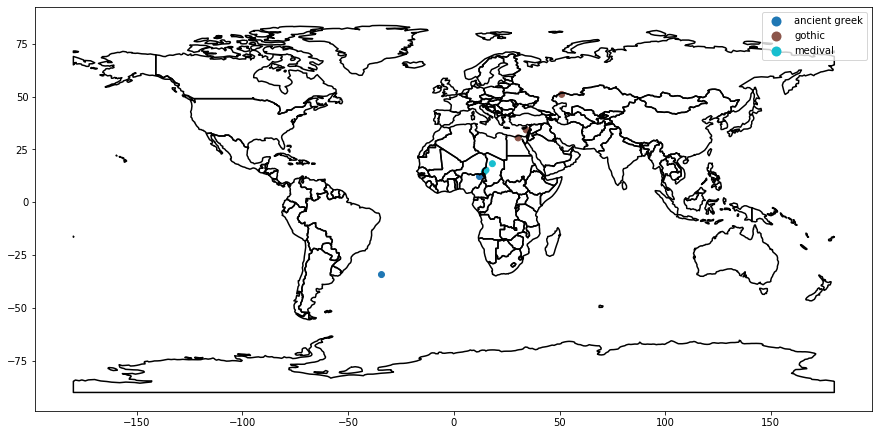

In [85]:
df = pandas.read_csv('dummy.csv')
gdf = geopandas.GeoDataFrame(df,geometry=geopandas.points_from_xy(df.lat, df.lat))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
ax = world.boundary.plot(color='k',figsize=(15,15))
gdf.plot(ax=ax,column='class',legend=True)

,class,geometry
1,ancient greek,POINT (-170.00000 -90.00000)
2,ancient greek,POINT (-160.00000 -90.00000)
3,ancient greek,POINT (-150.00000 -90.00000)
4,ancient greek,POINT (-140.00000 -90.00000)
5,ancient greek,POINT (-130.00000 -90.00000)
...,...,...
625,ancient greek,POINT (-50.00000 80.00000)
626,ancient greek,POINT (-40.00000 80.00000)
627,ancient greek,POINT (-30.00000 80.00000)
628,ancient greek,POINT (-20.00000 80.00000)


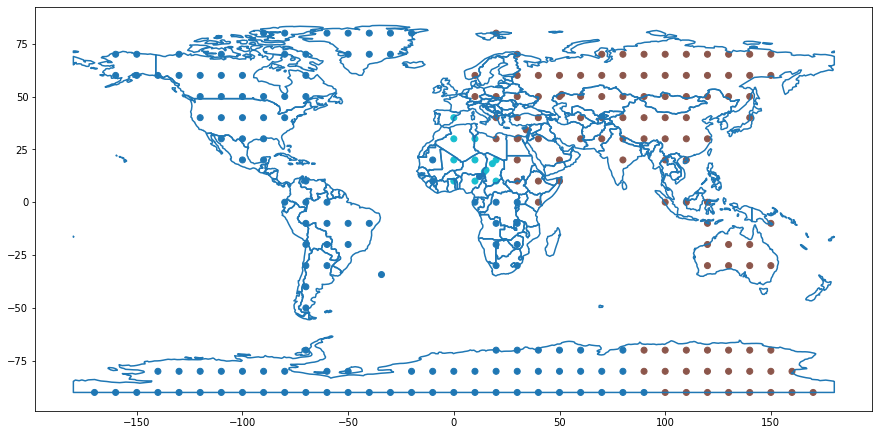

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
data = df[['lat','lng']].to_numpy()
classes = df['class']
x = np.arange(-180,180,10)
y = np.arange(-90,90,10)
clf = neighbors.KNeighborsClassifier(2, weights='uniform')
clf.fit(data, classes)
xx,yy = np.meshgrid(x,y)
pred = clf.predict(np.c_[xx.ravel(),yy.ravel()])
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
fig,ax = plt.subplots(figsize=(15,15))
gdf = geopandas.GeoDataFrame(df,geometry=geopandas.points_from_xy(df.lat, df.lat))
points = geopandas.GeoDataFrame({'class':pred},geometry=geopandas.points_from_xy(xx.ravel(),yy.ravel()))
points.crs = world.crs
points = points[~points.geometry.disjoint(world.unary_union)]
points.plot(ax=ax,column='class')
gdf.plot(column='class',ax=ax)
world.boundary.plot(ax=ax)